In [157]:
import pandas as pd
import numpy as np

In [158]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [159]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [160]:
test_index = test['Loan_ID'].values

## EDA

In [161]:
train['Loan_Status'].value_counts()/train.shape[0]

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [162]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [163]:
train[train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


### Credit History

In [164]:
pd.crosstab(train['Credit_History'],train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


- So there could be relation between No credit history and not granting the loan
- S0 better to create a missing variable for credit history

In [165]:
train['missing_credit_history'] = train['Credit_History'].isnull()
test['missing_credit_history'] = test['Credit_History'].isnull()

### Self Employed

In [166]:
train.groupby(['Self_Employed'])['Loan_Status'].count()

Self_Employed
No     500
Yes     82
Name: Loan_Status, dtype: int64

In [167]:
pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [168]:
train[train['Self_Employed'].isnull()]['Loan_Status'].value_counts()

Y    23
N     9
Name: Loan_Status, dtype: int64

- It can crealy be seen that Self employment is not having much impact on loan approval


### Dependents

In [169]:
pd.crosstab(train['Dependents'],train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


- Not much Impact

### Loan Amount

In [170]:
train.groupby(['Loan_Status'])['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [171]:
train.groupby(['Loan_Status'])['LoanAmount'].std()

Loan_Status
N    85.862783
Y    85.484607
Name: LoanAmount, dtype: float64

In [172]:
train.groupby(['Loan_Status'])['LoanAmount'].min()

Loan_Status
N     9.0
Y    17.0
Name: LoanAmount, dtype: float64

In [173]:
train.groupby(['Loan_Status'])['LoanAmount'].max()

Loan_Status
N    570.0
Y    700.0
Name: LoanAmount, dtype: float64

- Loan Amount seems to be consistent among the Approved or Not Approved loans

In [174]:
pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0,1
36.0,2,0
60.0,0,2
84.0,1,3
120.0,0,3
180.0,15,29
240.0,1,3
300.0,5,8
360.0,153,359


## Imputations

- Dependents & Self Employed to be Mode imputed
- Loan Amount to be mean imputed
- Loan Amount term to be mean imputed
- Credit History to be fillna by 0
- Married and Gender to be mode imputed

In [175]:
# Before setting the Imputation check the dtypes
train.dtypes

Loan_ID                    object
Gender                     object
Married                    object
Dependents                 object
Education                  object
Self_Employed              object
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Property_Area              object
Loan_Status                object
missing_credit_history       bool
dtype: object

- Gender, Married, Dependents, Self Employed dtype are okay
- Loan amount, Loan Amount term & Credit history dtype is also okay
- So we are good to go ahead with Imputations

In [176]:
# Credit History
train['Credit_History'] = train['Credit_History'].fillna(0)
test['Credit_History'] = test['Credit_History'].fillna(0)

In [177]:
# Mode Imputation
cols = ['Gender','Married','Dependents','Self_Employed']

from sklearn.impute import SimpleImputer
mode_imp = SimpleImputer(strategy='most_frequent')
mode_imp.fit(train[cols])
train[cols] = mode_imp.transform(train[cols])
test[cols] = mode_imp.transform(test[cols])

In [178]:
# Mean Imputation
cols = ['LoanAmount','Loan_Amount_Term']

from sklearn.impute import SimpleImputer
mode_imp = SimpleImputer(strategy='mean')
mode_imp.fit(train[cols])
train[cols] = mode_imp.transform(train[cols])
test[cols] = mode_imp.transform(test[cols])

In [179]:
train.nunique()

Loan_ID                   614
Gender                      2
Married                     2
Dependents                  4
Education                   2
Self_Employed               2
ApplicantIncome           505
CoapplicantIncome         287
LoanAmount                204
Loan_Amount_Term           11
Credit_History              2
Property_Area               3
Loan_Status                 2
missing_credit_history      2
dtype: int64

In [180]:
test.nunique()

Loan_ID                   367
Gender                      2
Married                     2
Dependents                  4
Education                   2
Self_Employed               2
ApplicantIncome           314
CoapplicantIncome         194
LoanAmount                145
Loan_Amount_Term           13
Credit_History              2
Property_Area               3
missing_credit_history      2
dtype: int64

In [181]:
train['Loan_Status'] = train['Loan_Status'].map({"Y":1,"N":0})

In [182]:
# Drop LoanID
train.drop(columns=['Loan_ID'],inplace=True)
test.drop(columns=['Loan_ID'],inplace=True)

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
pd.crosstab(train['Education'],train['Loan_Status'])

Loan_Status,0,1
Education,,
Graduate,140,340
Not Graduate,52,82


In [185]:
# Label encoding for Education, Property Area
train['Property_Area'] = train['Property_Area'].map({"Rural":0,"Semiurban":1,"Urban":2})
test['Property_Area'] = test['Property_Area'].map({"Rural":0,"Semiurban":1,"Urban":2})
train['Education'] = train['Education'].map({"Not Graduate":0,"Graduate":1})
test['Education'] = test['Education'].map({"Not Graduate":0,"Graduate":1})

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    object 
 1   Married                 614 non-null    object 
 2   Dependents              614 non-null    object 
 3   Education               614 non-null    int64  
 4   Self_Employed           614 non-null    object 
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    int64  
 11  Loan_Status             614 non-null    int64  
 12  missing_credit_history  614 non-null    bool   
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 58.3+ KB


In [187]:
# merge train and test before converting to dummies
df = pd.concat([train,test],ignore_index=True)

In [188]:
df = pd.get_dummies(df)

In [189]:
train = df[:len(train)]
test = df[len(train):]

In [190]:
test.drop(columns=['Loan_Status'],inplace=True)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## ML Modelling

### Random Forest Classifier

In [191]:
clf = RandomForestClassifier(random_state=42)
clf.fit(train.drop(columns=['Loan_Status']),train['Loan_Status'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [192]:
pred = clf.predict(test)
sub = pd.DataFrame({"Loan_ID":test_index,"Loan_Status":pred})
sub['Loan_Status'] = sub['Loan_Status'].map({1.:"Y",0.:"N"})
sub.to_csv('sub_rf.csv',index=False)

In [198]:
# Logistics Regression
from sklearn.linear_model import LogisticRegression

### Logistics Classification

In [200]:
clf = LogisticRegression(random_state=42)
clf.fit(train.drop(columns=['Loan_Status']),train['Loan_Status'])

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
pred = clf.predict(test)
sub = pd.DataFrame({"Loan_ID":test_index,"Loan_Status":pred})
sub['Loan_Status'] = sub['Loan_Status'].map({1.:"Y",0.:"N"})
sub.to_csv('sub_lc.csv',index=False)

### XGBoost Classification

In [210]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

In [206]:
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

In [207]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [208]:
clf = XGBClassifier(seed=42)

In [209]:
clf.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.804525
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.818815
[2]	validation_0-aucpr:0.814571
[3]	validation_0-aucpr:0.813555
[4]	validation_0-aucpr:0.813555
[5]	validation_0-aucpr:0.820905
[6]	validation_0-aucpr:0.838147
[7]	validation_0-aucpr:0.85094
[8]	validation_0-aucpr:0.837286
[9]	validation_0-aucpr:0.845597
[10]	validation_0-aucpr:0.846852
[11]	validation_0-aucpr:0.85187
[12]	validation_0-aucpr:0.854927
[13]	validation_0-aucpr:0.853048
[14]	validation_0-aucpr:0.851053
[15]	validation_0-aucpr:0.853829
[16]	validation_0-aucpr:0.848743
[17]	validation_0-aucpr:0.853259
[18]	validation_0-aucpr:0.853402
[19]	validation_0-aucpr:0.853084
[20]	validation_0-aucpr:0.851009
[21]	validation_0-aucpr:0.852823
[22]	validation_0-aucpr:0.849101
Stopping. Best iteration:
[12]	validation_0-aucpr:0.854927



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

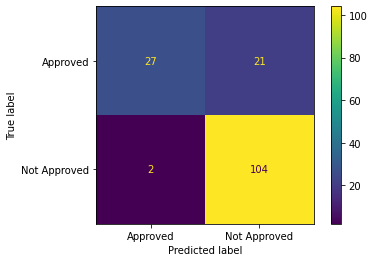

In [213]:
plot_confusion_matrix(clf,X_test,y_test,values_format='d',display_labels=['Approved','Not Approved'])

In [216]:
pred = clf.predict(test)
sub = pd.DataFrame({"Loan_ID":test_index,"Loan_Status":pred})
sub['Loan_Status'] = sub['Loan_Status'].map({1.:"Y",0.:"N"})
sub.to_csv('sub_xgb.csv',index=False)